# Assignment 6
### Do Question 6, and three more questions of your choice.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.


### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

The sample space for rolling a fair single six-sided die is {1,2,3,4,5,6,{}}. The probability for each and any event is 1/6. There are many possible space of events that can occur with rolling a six sided dice. For the sake of brevity, lets look at two possible events that can occur when rolling a dice: rolling an even number and rolling an odd number. Let's start with rolling an even number. The space of events for rolling an even number is {2,4,6,{}}. The probability of rolling an even number is 1/2. The sample space for rolling an odd number is {1,3,5,{}}. The probability of rolling an odd number is 1/2.

(array([0.1764, 0.339 , 0.4976, 0.6686, 0.8404, 1.    ]),
 array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
        2.44948974]))

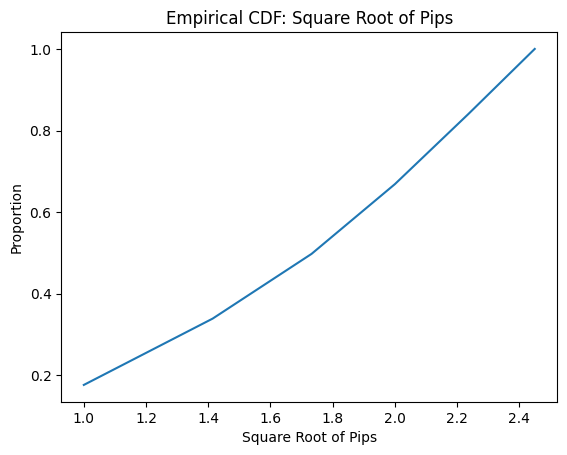

In [2]:
def dice_simulate(sim_num):
    var_list = []
    rng = np.random.default_rng(seed=100) # Set the seed for reproducibility
    draws = rng.integers(low=1, high=7,size=sim_num) # Draw 20 integers at random from 0 to <7=6



    # calculating the random variable = the square root of the number of pips on the die to each outcome 
    # gotta iterate through the array and then add the 
    for x in draws:
        rand_var = np.sqrt(x)
        var_list.append(rand_var)

    # okay need to plot the mass function
    # platting the ecdf
    Z = np.sort(pd.Series(var_list).unique()) 
    compare = pd.Series(var_list).to_numpy().reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare,axis=0)
    # Plot the ecdf:
    title_str = 'Square Root of Pips'
    plt.plot(Z,ecdf)
    plt.title(f'Empirical CDF: {title_str}')
    plt.ylabel('Proportion')
    plt.xlabel(title_str)
    return ecdf, Z


dice_simulate(5000)

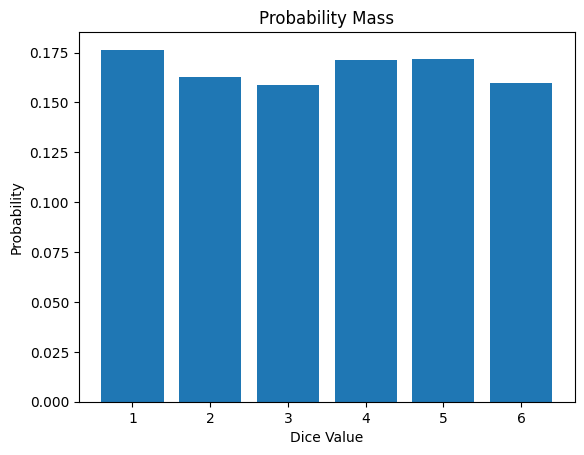

In [3]:
def dice_simulate_mass_function(sim_num):
    var_list = []
    rng = np.random.default_rng(seed=100) # Set the seed for reproducibility
    draws = rng.integers(low=1, high=7,size=sim_num) # Draw 20 integers at random from 0 to <7=6



    # calculating the random variable = the square root of the number of pips on the die to each outcome 
    # gotta iterate through the array and then add the 
    for x in draws:
        rand_var = np.sqrt(x)
        var_list.append(rand_var)

    val, cnt = np.unique(draws, return_counts=True)
    pmf = cnt / len(draws)

    # Plotting the PMF
    plt.bar(val, pmf)
    plt.xlabel("Dice Value")
    plt.ylabel("Probability")
    plt.title("Probability Mass")
    plt.show()



dice_simulate_mass_function(5000)

The sample space for rolling the two fair six-sided die is going to consist of dice_one={1,2,3,4,5,6} and dice_two={1,2,3,4,5,6}. Combining these two possibilities gives us a sample space of ordered pairs {(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6), (5,1),(5,2),(5,3),(5,4),(5,5),(5,6), (6,1),(6,2),(6,3),(6,4),(6,5),(6,6)}

The sample space for the random variable is {2,3,4,5,6,7,8,9,10,11,12}. 

The space of events includes every possible combination of rolling the two die. More specifically, every possible combination (every subset) of faces that the die can land on is the space of events. 

The probabilities of the outcomes (pips) are as follows: 

2: (1,1) --> 1/36

3: (1,2) (2,1) --> 2/36 --> 1/18

4: (1,3) (2,2) (3,1) --> 3/36

5: (1,4) (4,1) (2,3) (3,2) --> 4/36 --> 1/9

6: (1,5) (5,1) (2,4) (4,2) (3,3) --> 5/36

7: (1,6) (6,1) (2,5) (5,2) (3,4) (4,3) --> 6/36 --> 1/6

8: (2,6) (6,2) (3,5) (5,3) (4,4) --> 5/36

9: (3,6) (6,3) (4,5) (5,4) --> 4/36 --> 1/9

10: (5,5) (6,4) (4,6) --> 3/36

11:(5,6) (6,5) --> 2/36 --> 1/18

12: (6,6) --> 1/36



(array([0.0282, 0.0834, 0.1682, 0.2794, 0.4157, 0.5783, 0.7162, 0.8297,
        0.9173, 0.9731, 1.    ]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

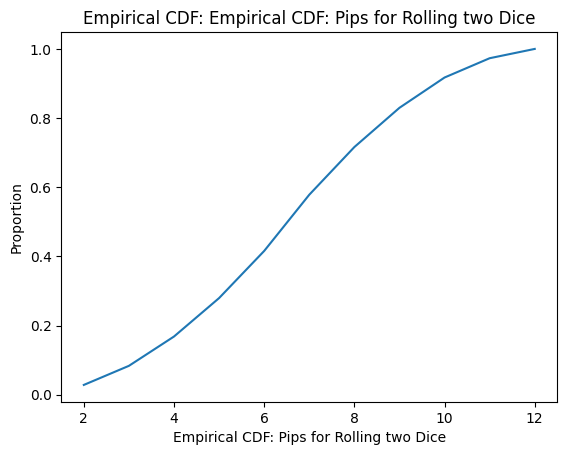

In [4]:
def two_dice_simulate(sim_num,num_dice=2):
    # pips = []
    rng = np.random.default_rng(seed=100) # Set the seed for reproducibility

    draws = rng.integers(low=1, high=7, size=(sim_num,num_dice)) # randomly generates 10,000 rolls, each roll consists of two dice rolls
    # now we want to sum each dice roll to get the pip
    pips = draws.sum(axis=1)
    # # calculating the random variable = the square root of the number of pips on the die to each outcome 
    # rand_var = np.sqrt(draws)
    # # okay going to append the values to a list so that i can use the .unique function later 
    # pips.append(rand_var)
    # # platting the ecdf
    Z = np.sort(pd.Series(pips).unique()) 
    compare = pd.Series(pips).to_numpy().reshape(-1,1) <= Z.reshape(1,-1)
    ecdf = np.mean(compare,axis=0)
    # Plot the ecdf:
    title_str = 'Empirical CDF: Pips for Rolling two Dice'
    plt.plot(Z,ecdf)
    plt.title(f'Empirical CDF: {title_str}')
    plt.ylabel('Proportion')
    plt.xlabel(title_str)
    return ecdf, Z


two_dice_simulate(10000,2)

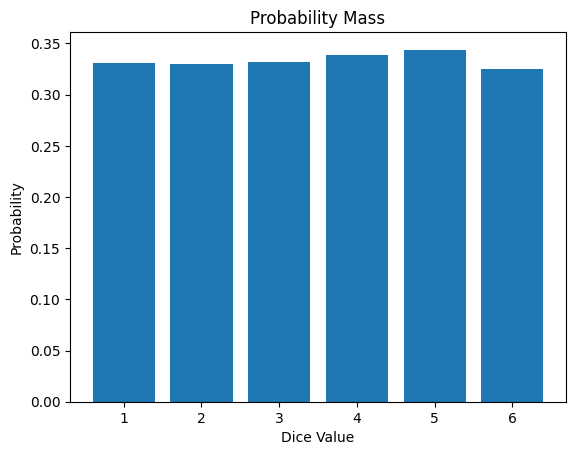

In [5]:
# doing the mass function
# Calculate the PMF from the sample
def two_dice_simulate_mass_function(sim_num,num_dice=2):
    # pips = []
    rng = np.random.default_rng(seed=100) # Set the seed for reproducibility

    draws = rng.integers(low=1, high=7, size=(sim_num,num_dice)) # randomly generates 10,000 rolls, each roll consists of two dice rolls
    # now we want to sum each dice roll to get the pip
    pips = draws.sum(axis=1)
    # # calculating the random variable = the square root of the number of pips on the die to each outcome 
    # rand_var = np.sqrt(draws)
    # # okay going to append the values to a list so that i can use the .unique function later 
    # pips.append(rand_var)
    # # platting the mass function
    # Calculate the PMF from the sample
    val, cnt = np.unique(draws, return_counts=True)
    pmf = cnt / len(draws)

    # Plotting the PMF
    plt.bar(val, pmf)
    plt.xlabel("Dice Value")
    plt.ylabel("Probability")
    plt.title("Probability Mass")
    plt.show()
   


two_dice_simulate_mass_function(10000,2)

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


Log-Normal Distribution

For the log-normal distribution, the support is all non-negative real numbers, not including 0.

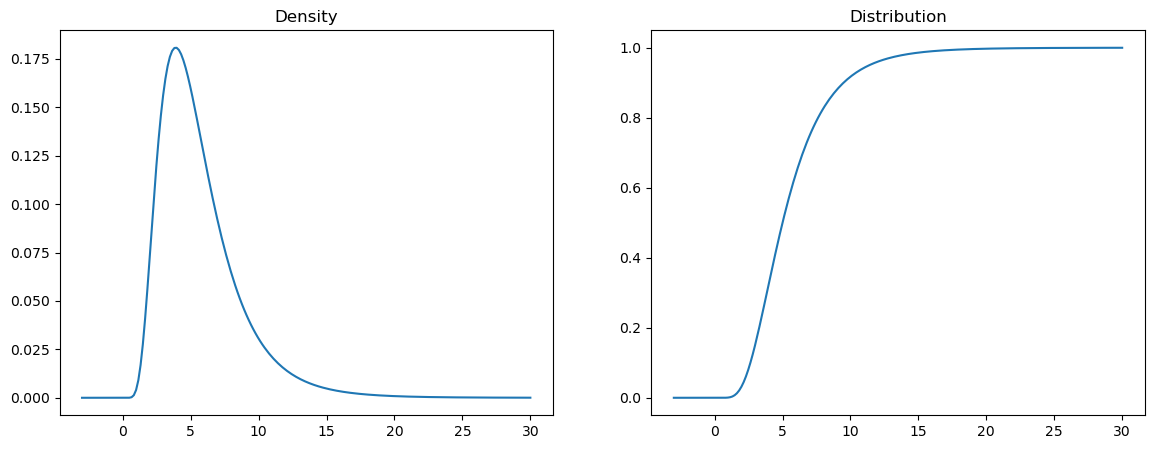

In [20]:
import scipy.stats as sp

mu = 5
sig_sq = 0.5

grid = np.linspace(-3,30,200)

## Plot the density and distribution
pdf = sp.lognorm.pdf(grid,scale=mu,s=sig_sq)
cdf = sp.lognorm.cdf(grid,scale=mu,s=sig_sq)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

Exponential Distribution

In [ ]:
from scipy.stats import exponnorm

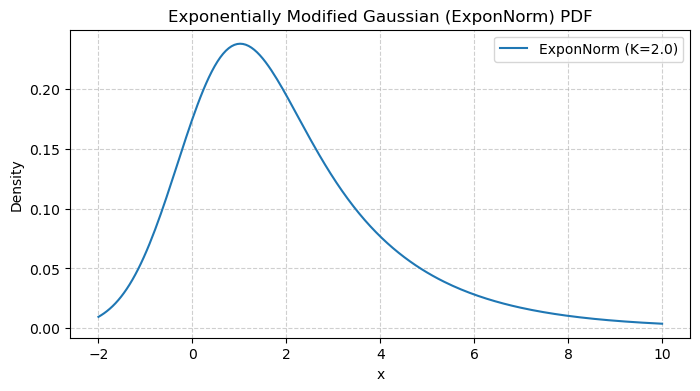

In [ ]:
K = 2.0  # The shape parameter
loc = 0
scale = 1


grid = np.linspace(-2, 10, 200)


pdf_values = sp.exponnorm.pdf(grid, K, loc=loc, scale=scale)

plt.figure(figsize=(8, 4))
plt.plot(grid, pdf_values, label=f'ExponNorm (K={K})') # Plot the PDF
plt.title('Exponentially Modified Gaussian (ExponNorm) PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show() 

Negative Binomial

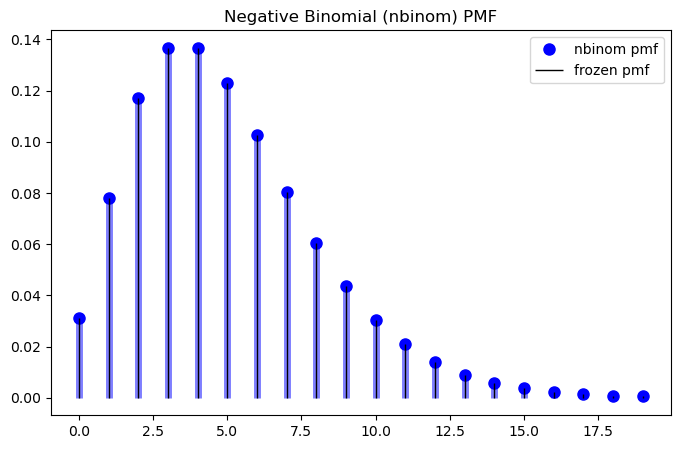

In [30]:
from scipy.stats import nbinom
n, p = 5, 0.5
x_min = sp.nbinom.ppf(0.001, n, p) 
x_max = sp.nbinom.ppf(0.999, n, p)
x = np.arange(x_min, x_max + 1)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))


ax.plot(x, sp.nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, sp.nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = sp.nbinom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')

ax.set_title('Negative Binomial (nbinom) PMF')
ax.legend(loc='best', frameon=True)
plt.show()

Categorical

In [31]:
probabilities = [0.1, 0.4, 0.35, 0.15] 
K = len(probabilities)
categories = np.arange(1, K + 1) # The support: [1, 2, 3, 4]

rv_categorical = sp.rv_discrete(name='categorical', values=(categories, probabilities))

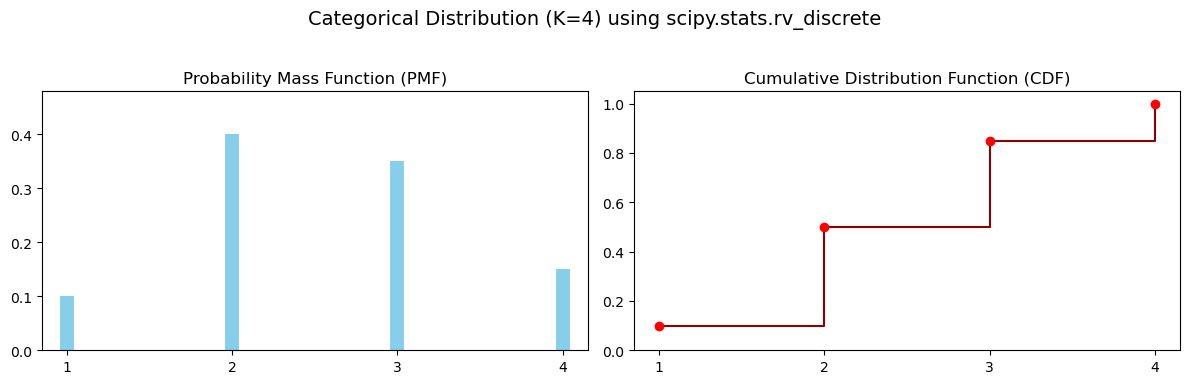

In [32]:

pmf_values = rv_categorical.pmf(categories)
cdf_values = rv_categorical.cdf(categories)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(f'Categorical Distribution (K={K}) using scipy.stats.rv_discrete', fontsize=14)


axes[0].vlines(categories, 0, pmf_values, colors='skyblue', lw=10, label='PMF')
axes[0].set_title('Probability Mass Function (PMF)')
axes[0].set_xticks(categories)
axes[0].set_ylim(0, max(pmf_values) * 1.2)

axes[1].step(categories, cdf_values, where='post', color='darkred', label='CDF')
axes[1].plot(categories, cdf_values, 'ro', ms=6) 
axes[1].set_title('Cumulative Distribution Function (CDF)')
axes[1].set_xticks(categories)
axes[1].set_ylim(0, 1.05)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

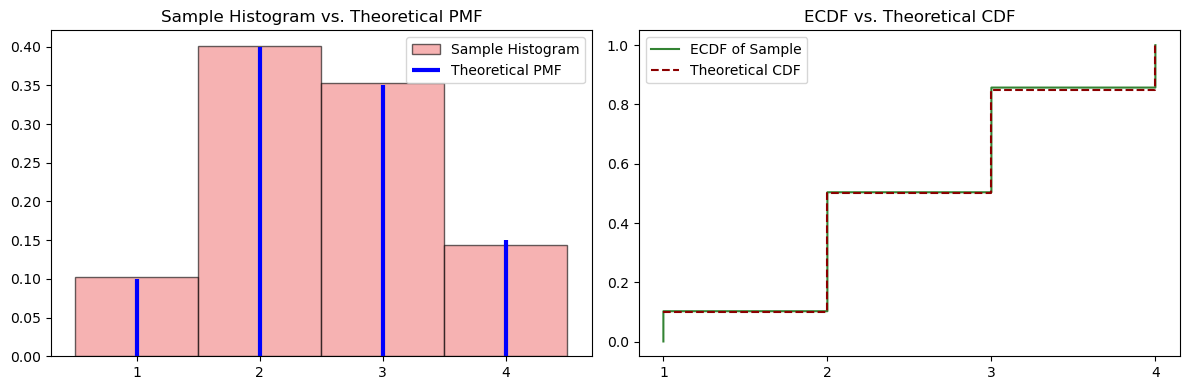

In [33]:

N = 1000

sample_draws = rv_categorical.rvs(size=N)
sample_sorted = np.sort(sample_draws)
ecdf_y = np.arange(1, N + 1) / N

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(sample_draws, bins=np.arange(0.5, K + 1.5, 1), density=True, 
             label='Sample Histogram', color='lightcoral', alpha=0.6, edgecolor='black')
axes[0].vlines(categories, 0, pmf_values, colors='b', lw=3, label='Theoretical PMF')
axes[0].set_title('Sample Histogram vs. Theoretical PMF')
axes[0].set_xticks(categories)
axes[0].legend()

axes[1].step(sample_sorted, ecdf_y, label='ECDF of Sample', color='darkgreen', alpha=0.8)
axes[1].step(categories, cdf_values, where='post', color='darkred', linestyle='--', label='Theoretical CDF')
axes[1].set_title('ECDF vs. Theoretical CDF')
axes[1].set_xticks(categories)
axes[1].legend()

plt.tight_layout()
plt.show()